In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
data=pd.read_csv("C:\\Users\\Tiger Syam\\Desktop\\IBM coursera\\SuperwisedML-Classification\\Projects\\Heart DIsease Prediction\\Datasets\\heart.csv")

In [3]:
dataset=data.copy()

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_recall_fscore_support




In [7]:
def get_accuracy(X_train,X_test,y_train,y_test,model):
    
    result={}
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    result['accuracy']=accuracy
    precision,recall,f_score,_=precision_recall_fscore_support(y_test,y_pred,average='binary')
    
    result['precision']=precision
    result['recall']=recall
    result['f_score']=f_score
    
    return result
    
    

In [8]:
def get_score(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [9]:
#our target variable has two classes
data['target'].unique()

array([0, 1], dtype=int64)

In [10]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

it seems to that the data is already preprocessed ...

Seperating target and labels

In [10]:
X=data.iloc[:,:-1]
y=data['target']


#### Train/Test split


In [12]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

it seems that the classes are balanced....so i am going with train/test/split

In [13]:
#import
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=45)

### Model Building

Here, we are building the models

->Logistic Regression

->KNN

->SVM

->Decision Trees

->Random Forest



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
133,50,1,2,129,196,0,1,163,0,0.0,2,0,2
814,62,1,1,128,208,1,0,140,0,0.0,2,0,2
554,58,1,0,100,234,0,1,156,0,0.1,2,1,3
313,74,0,1,120,269,0,0,121,1,0.2,2,1,2
401,71,0,0,112,149,0,1,125,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,58,1,0,125,300,0,0,171,0,0.0,2,2,3
101,57,1,2,150,126,1,1,173,0,0.2,2,1,3
502,46,0,2,142,177,0,0,160,1,1.4,0,0,2
658,64,1,2,125,309,0,1,131,1,1.8,1,0,3


#### Logistic Regression

In [15]:
#importing model
from sklearn.linear_model import LogisticRegression


In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

In [17]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=lg.predict(X_test_s)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
#model accuracy
get_accuracy(X_train,X_test,y_train,y_test,lg)

{'accuracy': 0.8571428571428571,
 'precision': 0.8166666666666667,
 'recall': 0.930379746835443,
 'f_score': 0.8698224852071006}

#### GridSearchCV

In [20]:
#import
from sklearn.model_selection import GridSearchCV

In [21]:
params_grid={'penalty':['l1','l2','elasticnet'],
             'C':[0.01,0.02,0.05,0.08,0.1,0.5,0.8,1,2,5,8,10,20],
             'solver':['liblinear','lbfgs','saga','newton-cg'],
             'max_iter':[50,100,150,200,500,1000]
            }

In [22]:
search=GridSearchCV(estimator=lg,param_grid=params_grid,scoring='accuracy')
search.fit(X_train_s,y_train)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2340 fits failed out of a total of 4680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tiger Syam\AppData\Roamin

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.05, 0.08, 0.1, 0.5, 0.8, 1, 2, 5,
                               8, 10, 20],
                         'max_iter': [50, 100, 150, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']},
             scoring='accuracy')

In [25]:
search.best_params_

{'C': 0.5, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}

In [26]:
search.best_score_

0.8381798756798757

In [101]:
model=LogisticRegression(C=1,max_iter=100,penalty='l2',solver='saga')
model.fit(X_train_s,y_train)

LogisticRegression(C=1, solver='saga')

In [28]:
y_pred_m=model.predict(X_test_s)

In [102]:
get_accuracy(X_train,X_test_s,y_train,y_test,model)

{'accuracy': 0.8603896103896104,
 'precision': 0.8285714285714286,
 'recall': 0.9177215189873418,
 'f_score': 0.8708708708708709}

In [103]:
accuracy_score(y_test,y_pred_m)

0.8603896103896104

In [106]:
get_score(X_train_s,X_test_s,y_train,y_test,model)

{'test Accuracy': 0.8603896103896104, 'trian Accuracy': 0.8396094839609484}

#### KNearestNeighbors

In [31]:
#import 
from sklearn.neighbors import KNeighborsClassifier

In [32]:
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=2)

In [33]:
y_pred=kn.predict(X_test_s)

In [34]:
get_accuracy(X_train,X_test_s,y_train,y_test,kn)

{'accuracy': 0.9253246753246753,
 'precision': 0.9787234042553191,
 'recall': 0.8734177215189873,
 'f_score': 0.923076923076923}

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
scores=cross_val_score(kn,X,y,cv=5)
scores

array([0.92682927, 0.94634146, 0.93170732, 0.94146341, 0.93170732])

In [109]:
get_score(X_train_s,X_test_s,y_train,y_test,kn)

{'test Accuracy': 0.9253246753246753, 'trian Accuracy': 0.9916317991631799}

##### HyperPrameter Tuning

In [37]:
max_k=50
f1_scores=[]
from sklearn.metrics import f1_score

In [38]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train_s, y_train.values.ravel())
    preds = knn.predict(X_test_s)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9679
2,0.9231
3,0.9139
4,0.8805
5,0.8536
6,0.8534
7,0.8562
8,0.8589
9,0.8696


Text(0.5, 1.0, 'KNN F1 Score')

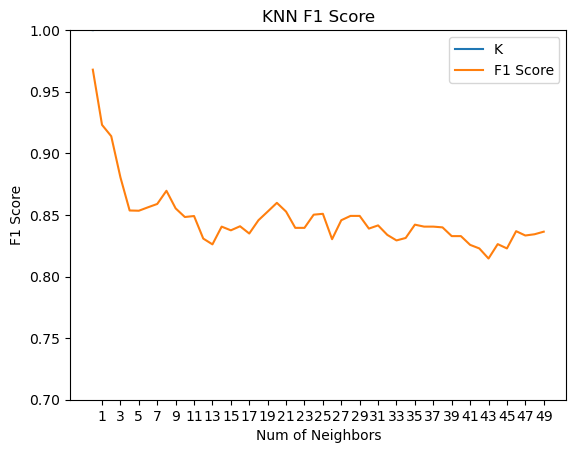

In [40]:
ax=f1_results.plot()
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.7, 1))
plt.title('KNN F1 Score')

#### SVM

In [41]:
#import 
from sklearn.svm import LinearSVC


In [42]:
svc=LinearSVC()
svc.fit(X_train_s,y_train)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [43]:
y_pred=svc.predict(X_test_s)

In [44]:
get_accuracy(X_train,X_test_s,y_train,y_test,svc)

{'accuracy': 0.8603896103896104,
 'precision': 0.8248587570621468,
 'recall': 0.9240506329113924,
 'f_score': 0.871641791044776}

In [45]:
from sklearn.svm import SVC

In [51]:
model=SVC()
model.fit(X_train_s,y_train)

SVC()

In [52]:
y_pred=model.predict(X_test_s)

In [53]:
get_accuracy(X_train_s,X_test_s,y_train,y_test,model)

{'accuracy': 0.8961038961038961,
 'precision': 0.8795180722891566,
 'recall': 0.9240506329113924,
 'f_score': 0.9012345679012346}

##### GridSearchCV

In [54]:
#import 
from sklearn.model_selection import GridSearchCV

In [112]:
params_grid={'C':[.1,.5,.7,.8,1,5,8,10,15,20,25,50,70,80,100],
             'kernel':['linear','poly','rbf','sigmoid'],
             
            }

In [113]:
search=GridSearchCV(estimator=SVC(),param_grid=params_grid,scoring='f1',cv=3)
search.fit(X_train_s,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 0.7, 0.8, 1, 5, 8, 10, 15, 20, 25, 50,
                               70, 80, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [70]:
search.best_score_

0.9631284771973304

In [71]:
search.best_params_

{'C': 50, 'kernel': 'poly'}

In [114]:
model=search.best_estimator_

In [74]:
#model=SVC(kernel='linear',C=1)
#model.fit(X_train_s,y_train)

In [115]:
get_accuracy(X_train,X_test_s,y_train,y_test,model)

{'accuracy': 0.9772727272727273,
 'precision': 0.9808917197452229,
 'recall': 0.9746835443037974,
 'f_score': 0.9777777777777777}

In [117]:
get_score(X_train_s,X_test_s,y_train,y_test,model)

{'test Accuracy': 0.9772727272727273, 'trian Accuracy': 1.0}

#### Decision Tree Classifier

In [118]:
#import 
from sklearn.tree import DecisionTreeClassifier

In [119]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
y_pred=dt.predict(X_test)

In [121]:
get_accuracy(X_train,X_test,y_train,y_test,dt)

{'accuracy': 0.9772727272727273,
 'precision': 1.0,
 'recall': 0.9556962025316456,
 'f_score': 0.9773462783171522}

##### GridSearchCV

In [122]:
#import 
from sklearn.model_selection import GridSearchCV

In [123]:
params_grid={'criterion':['gini','entropy','log_loss'],
             'max_depth':[1,2,5,10,15,20,25,30],
             'max_features':['auto','sqrt']
            }

In [124]:
search=GridSearchCV(estimator=DecisionTreeClassifier(),cv=5,scoring='accuracy',param_grid=params_grid)
search.fit(X_train,y_train)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _vali

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt']},
             scoring='accuracy')

In [125]:
best_model=search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=30, max_features='sqrt')

In [126]:
search.best_params_

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt'}

In [127]:
search.best_score_

0.9776612276612276

In [129]:
get_score(X_train,X_test,y_train,y_test,best_model)

{'test Accuracy': 0.9675324675324676, 'trian Accuracy': 1.0}

In [130]:
get_accuracy(X_train,X_test,y_train,y_test,best_model)

{'accuracy': 0.9675324675324676,
 'precision': 0.9805194805194806,
 'recall': 0.9556962025316456,
 'f_score': 0.967948717948718}

#### RandomForestClassifier

In [131]:
#import 
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
get_accuracy(X_train,X_test,y_train,y_test,rf)

{'accuracy': 0.9902597402597403,
 'precision': 1.0,
 'recall': 0.9810126582278481,
 'f_score': 0.9904153354632589}

In [139]:
get_score(X_train,X_test,y_train,y_test,rf)

{'test Accuracy': 0.9902597402597403, 'trian Accuracy': 1.0}

##### GridSearchCV

In [140]:
#import
from sklearn.model_selection import GridSearchCV 

In [141]:
params_grid={'criterion':['entropy','gini'],
             'n_estimators':[2*n+1 for n in range(20)],
             'max_depth':[2*n+1 for n in range(10)],
             'max_features':['auto','sqrt']
            }

In [144]:
rf_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_grid,scoring='accuracy')
rf_search.fit(X_train,y_train)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _v

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [146]:
rf_search.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'sqrt',
 'n_estimators': 23}

In [148]:
best_rf_model=rf_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=19, n_estimators=23)

In [149]:
rf_search.best_score_

0.9776320901320903

In [150]:
get_score(X_train,X_test,y_train,y_test,best_rf_model)

{'test Accuracy': 0.9902597402597403, 'trian Accuracy': 1.0}

In [151]:
get_accuracy(X_train,X_test,y_train,y_test,best_rf_model)

{'accuracy': 0.9902597402597403,
 'precision': 1.0,
 'recall': 0.9810126582278481,
 'f_score': 0.9904153354632589}

### KMeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
df=data.drop('target',axis=1)

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [20]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss=StandardScaler()


In [61]:
cols=df.columns.tolist()

In [64]:
for col in cols:
    df[col]=ss.fit_transform(df[[col]])

In [67]:
km=KMeans(n_clusters=3,init='k-means++')


In [68]:
km.fit(df)

C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [69]:
km.inertia_

10414.095049126965

In [70]:
km.cluster_centers_

array([[ 0.39036391,  0.25205862, -0.7523994 ,  0.22763052,  0.17801404,
         0.10982799, -0.18000358, -0.8385598 ,  0.8457381 ,  0.78018694,
        -0.66637014,  0.5987298 ,  0.43571731],
       [ 0.06954571, -1.51170646,  0.31950615, -0.10708515,  0.19863184,
        -0.15757108,  0.09323238,  0.1959289 , -0.42955389, -0.46764954,
         0.28728816, -0.42939699, -0.49601747],
       [-0.35070055,  0.66150409,  0.41722811, -0.1202829 , -0.25514298,
         0.00237737,  0.0902375 ,  0.55637112, -0.42882178, -0.35486157,
         0.36706125, -0.23210329, -0.06421746]])

In [71]:
km.labels_

array([2, 0, 0, ..., 0, 1, 0])

In [75]:
inertia=[]
clusters=range(1,5)

for cluster in clusters:
    km=KMeans(n_clusters=cluster,init='k-means++')
    km.fit(df)
    
    inertia.append(km.inertia_)
    
elb_df=pd.DataFrame({'clusters':clusters,'inertia':inertia})    





C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tiger Syam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: Fut

In [77]:
elb_df=elb_df.set_index('clusters')

In [78]:
elb_df

,inertia
clusters,
1,13325.000000
2,11245.051852
3,10416.465426
4,9689.449378


<Axes: xlabel='clusters'>

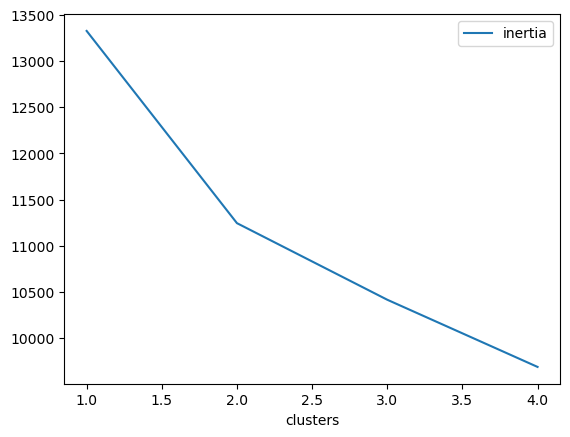

In [79]:
elb_df.plot()